In [890]:
import pandas as pd
from gensim.models import Word2Vec, KeyedVectors
import copy
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [891]:
#constantes:
num_clusters = 700

In [892]:
#pegando o dataframe
df = pd.read_csv('data/laptop_filtered_aspect_sample.csv')
df

,aspect_name
0,laptop
1,use
2,computer
3,screen
4,price
...,...
7330,cool feature
7331,professional laptop
7332,professional life
7333,professional look


In [893]:
words = df.values.tolist()
clean_words = []
clean_vector = []
for word in words:
    clean_words.append(nltk.word_tokenize(word[0]))
for word in words:
    clean_vector.append(word[0].split(" "))

In [894]:
#treinando o modelo de wordvec
model = Word2Vec(sg=0, ns_exponent=0.75,min_count=1, size=32, workers=1,seed=7)
model.build_vocab(clean_words, progress_per=10000)
model.train(clean_words, total_examples=model.corpus_count, epochs=60, report_delay=1)

(663266, 720900)

In [895]:
np_vector = []
np_label = []
for vec in clean_vector:
    count = 0
    string = ''
    aux = []
    exist = False
    for word in vec:
        if word in  model.wv.vocab:
            string += word + ' '
            aux.append(model[word])
            exist = True
    if exist:
        aux = sum(aux)/len(aux)
        np_vector.append(aux)
        np_label.append(string)

C:\Users\Laura\Anaconda3\envs\pnl\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [896]:
#colocando o modelo do TSNE 
from sklearn.manifold import TSNE
SNEt = TSNE(n_components=2, random_state=4)
tsne_data = SNEt.fit_transform(np_vector)

In [897]:
tsne_word = []
for key, tupla in enumerate(tsne_data):
    tsne_word.append(tsne_data[key].tolist())
    tsne_word[key].append(np_label[key])

In [898]:
sne_pd = pd.DataFrame(tsne_word, columns=['X','Y','Word'])
sne_pd.head()

,X,Y,Word
0,-13.880808,45.260624,laptop
1,-23.835672,34.531693,use
2,-13.794401,46.060638,computer
3,-39.608086,4.042678,screen
4,-15.035504,47.118874,price


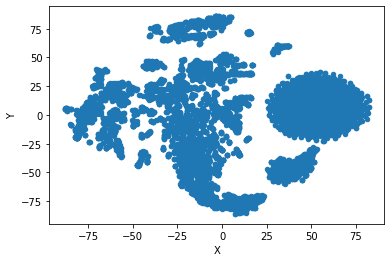

In [899]:
sne_pd.plot.scatter(x='X',y='Y')
plt.show()

In [900]:
#usando k-means
from sklearn.cluster import KMeans
%matplotlib inline

In [901]:
#testando agora com a clusterizacao depois do tsne

In [902]:
#treinando o modelo
clustering = KMeans(n_clusters=num_clusters, random_state=8)
clustering.fit(sne_pd[['X','Y']])
predictClusterKMeans = clustering.predict(sne_pd[['X','Y']])

In [903]:
#achando os centroides
centersKmeans = clustering.cluster_centers_
centersKmeans = pd.DataFrame(centersKmeans,columns=['X','Y'])
centersKmeans.head(5)

,X,Y
0,14.919762,71.670358
1,-22.873140,-14.398328
2,44.846196,-1.102414
3,17.822941,-73.316343
4,-61.626251,-4.233448


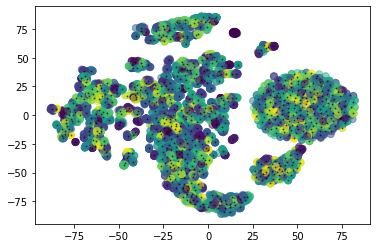

In [904]:
#plotando a resposta
plt.scatter(sne_pd['X'], sne_pd['Y'], c=predictClusterKMeans, s=50, alpha=0.5)
plt.scatter(centersKmeans['X'], centersKmeans['Y'], c='black', s=1, alpha=0.5)
plt.show()


In [905]:
sne_pd['Group'] = predictClusterKMeans
sne_pd = sne_pd.sort_values('Group')
sne_pd.head()

,X,Y,Word,Group
4316,15.458570,71.288689,very interesting,0
7146,15.854190,71.051041,very firm,0
7163,15.602552,71.528290,very natural,0
3082,15.121326,71.344284,very dependable,0
2620,14.272237,72.478813,very dissatisfied,0


In [906]:
sne_pd.loc[sne_pd['Group'] == 10]

,X,Y,Word,Group
4977,7.023483,14.916942,bit hard,10
2206,7.005365,14.903019,really hard,10
1809,6.993125,14.907119,very hard,10
2728,7.024361,14.903269,too hard,10
5672,7.012806,14.915442,extremely hard,10


In [ ]:
import glob
files_present = True
while(files_present):
    name = input('nome que deseja para o arquivo resposta:')
    filename = name + '.csv'
    files_present = glob.glob(filename)
    if not files_present:
        sne_pd.to_csv(filename, encoding='utf-8', index=False, columns=['Word','Group'])
        files_present = False
    else:
        print('Esse Arquivo Já Existe, Tente novamente') 
        


,X,Y
0,-12.458729,79.977226
1,-37.039921,57.506691
2,-13.862880,78.773529
3,-13.074478,79.401512
4,-24.055494,72.964653
...,...,...
7322,23.934101,-64.390694
7323,-39.697456,41.522041
7324,23.840078,-27.748844
7325,27.592096,-56.580265
